In [1]:
import json
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
with open('GridSearch_results/ease_history.json') as f:
    history = json.load(f)

In [3]:
history_recall_1 = []
history_recall_5 = []
history_recall_10 = []
history_recall_50 = []
history_ndcg_1 = []
history_ndcg_5 = []
history_ndcg_10 = []
history_ndcg_50 = []
for metric in history['score']:
    history_ndcg_1.append(metric['ndcg@1'])
    history_ndcg_10.append(metric['ndcg@10'])
    history_ndcg_5.append(metric['ndcg@5'])
    history_ndcg_50.append(metric['ndcg@50'])
    history_recall_1.append(metric['recall@1'])
    history_recall_10.append(metric['recall@10'])
    history_recall_5.append(metric['recall@5'])
    history_recall_50.append(metric['recall@50'])

In [63]:
def plot_for_metric(scores: list, l2: list, metric: str):
    plt.plot(l2, scores)
    plt.title(metric)
    plt.xlabel('$\lambda$')
    plt.ylabel('Score')
    return 

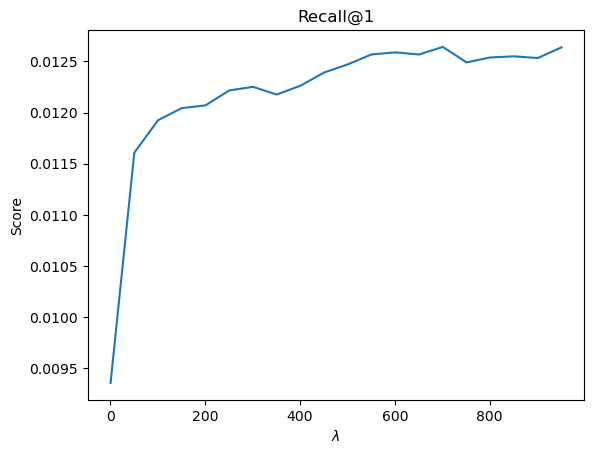

In [64]:
plot_for_metric(l2=history['l2'], scores=history_recall_1, metric='Recall@1')
plt.show()

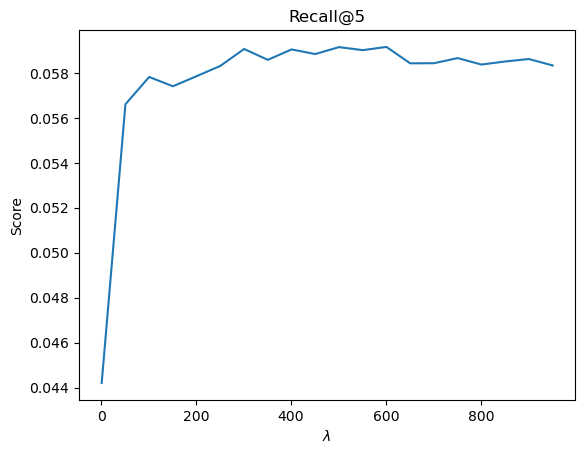

In [46]:
plot_for_metric(l2=history['l2'], scores=history_recall_5, metric='Recall@5')
plt.show()

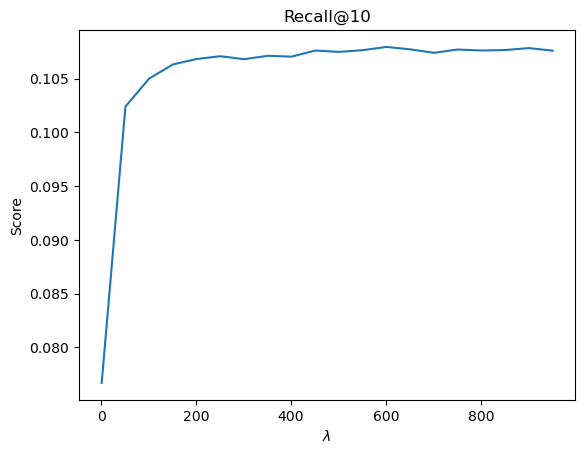

In [47]:
plot_for_metric(l2=history['l2'], scores=history_recall_10, metric='Recall@10')
plt.show()

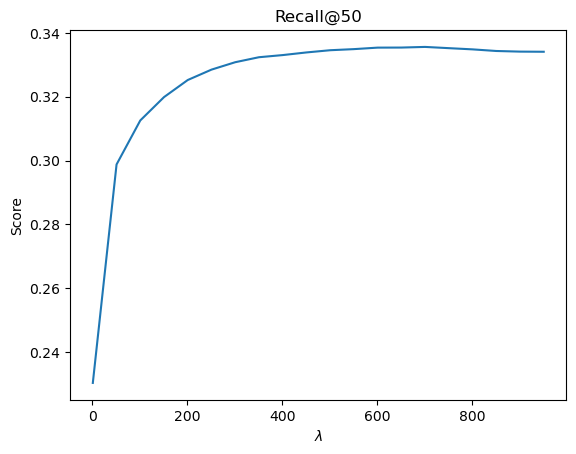

In [48]:
plot_for_metric(l2=history['l2'], scores=history_recall_50, metric='Recall@50')
plt.show()

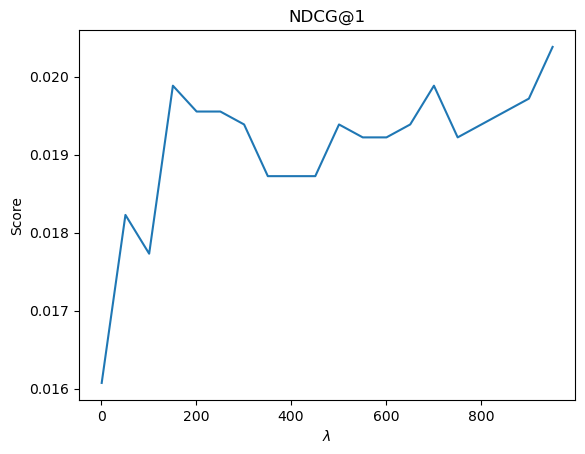

In [49]:
plot_for_metric(l2=history['l2'], scores=history_ndcg_1, metric='NDCG@1')
plt.show()

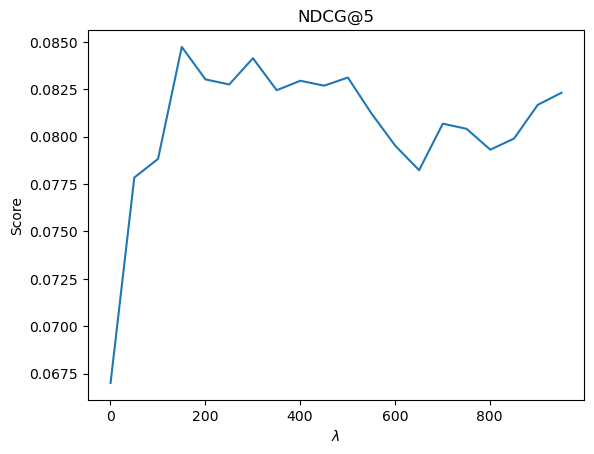

In [50]:
plot_for_metric(l2=history['l2'], scores=history_ndcg_5, metric='NDCG@5')
plt.show()

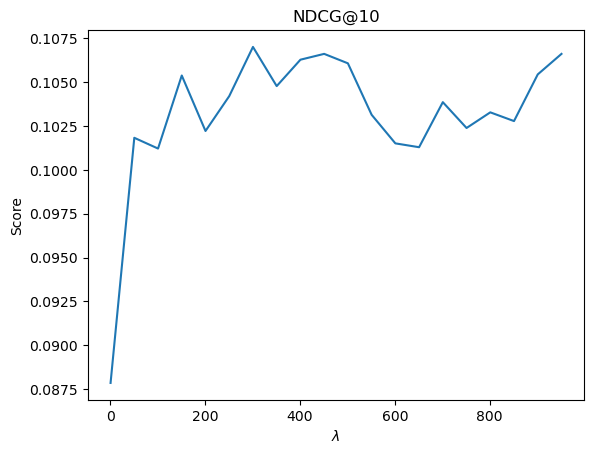

In [51]:
plot_for_metric(l2=history['l2'], scores=history_ndcg_10, metric='NDCG@10')
plt.show()

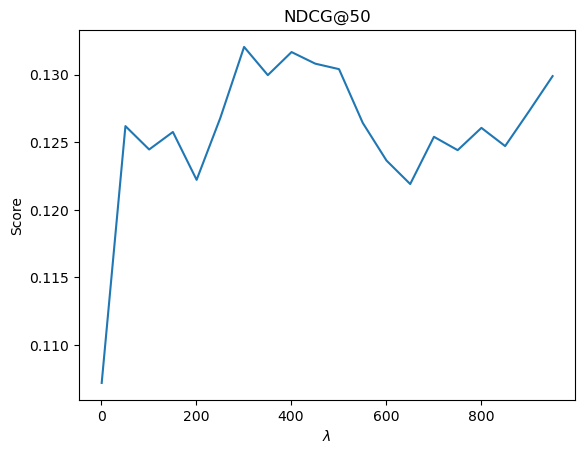

In [52]:
plot_for_metric(l2=history['l2'], scores=history_ndcg_50, metric='NDCG@50')
plt.show()

In [77]:
def plot_4_metrics(metrics: list, scores: list, l2: list):
    fig, ax = plt.subplots(2, 2, figsize=(7, 6))
    for i, metric, score in zip([0, 1], metrics[:2], scores[:2]):
        ax[0, i].plot(l2, score)
        ax[0, i].set_title(metric)
        ax[0, i].set_xlabel('$\lambda$')
        ax[0, i].set_ylabel('Score')
    for i, metric, score in zip([0, 1], metrics[2:], scores[2:]):
        ax[1, i].plot(l2, score)
        ax[1, i].set_title(metric)
        ax[1, i].set_xlabel('$\lambda$')
        ax[1, i].set_ylabel('Score')
    plt.tight_layout()
    plt.show()

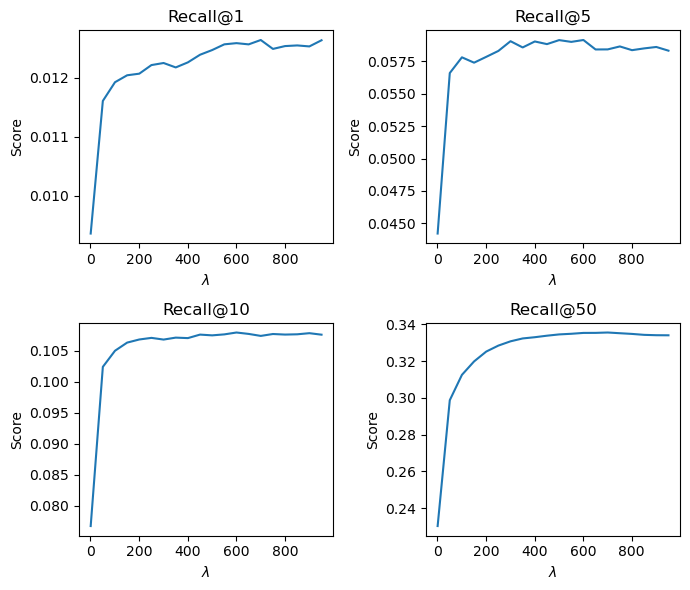

In [78]:
plot_4_metrics(metrics=['Recall@1', 'Recall@5', 'Recall@10', 'Recall@50'],
              scores=[history_recall_1, history_recall_5, history_recall_10, history_recall_50],
              l2=history['l2'])

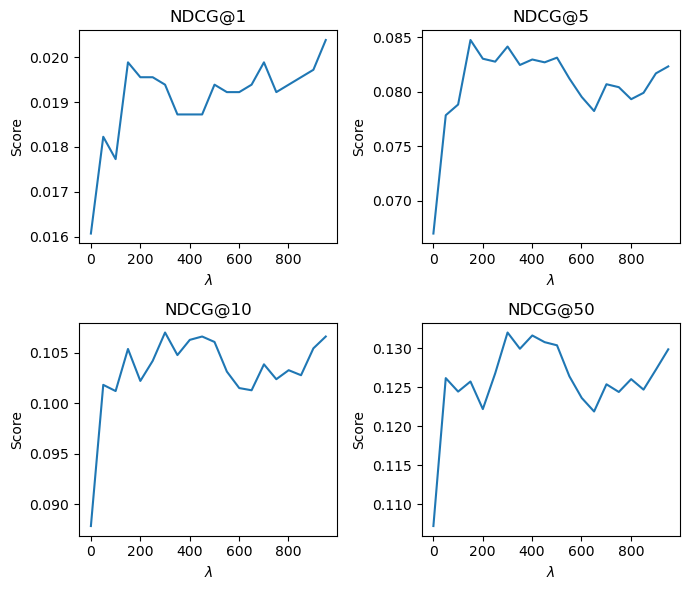

In [79]:
plot_4_metrics(metrics=['NDCG@1', 'NDCG@5', 'NDCG@10', 'NDCG@50'],
              scores=[history_ndcg_1, history_ndcg_5, history_ndcg_10, history_ndcg_50],
              l2=history['l2'])